In [1]:
# from gensim.models import Word2Vec
import gensim.models.keyedvectors as word2vec
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
model = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [17]:
# (model.wv['don\'t'])

In [103]:
lyrics = 'We don\'t need no education us'
words = lyrics.split(' ')
pca = PCA(n_components=2)
# vectors = []

X = model[words]
print(X.shape)
word_embeddings = pca.fit_transform(model[words])

print(word_embeddings)

# r1 = results[0]
# r2 = results[1]
# 
# lin = np.linspace(r1, r2, 50)

# print(lin)
# for word in words:
#     print(word)
#     print(model[word].shape)
#     pca.fit_transform(model[word])

(6, 300)
[[-1.0482829  -1.6985768 ]
 [ 2.2712178  -0.07831976]
 [-0.1260357   0.19059786]
 [ 0.31040227  0.55622715]
 [-1.1099584   1.7782776 ]
 [-0.2973432  -0.7482061 ]]


In [92]:
import numpy as np
def f(a, b):
    def eq(theta, phi):
        return np.sin(a * theta) + np.cos(b * phi)
    return eq

def plain(x, y):
    return x + y

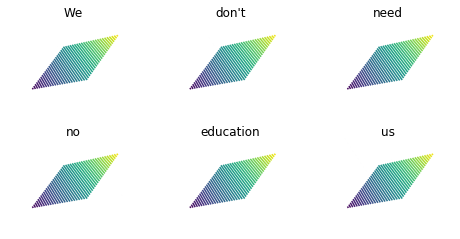

In [93]:
# fig = plt.figure()
fig = plt.figure(figsize=plt.figaspect(0.5))
# fig, axs = plt.subplots(nrows=3, ncols=6)

for i in range(results.shape[0]):
    result = results[i]
    eq = plain
#     eq = f(result[0], result[1])
    x = np.linspace(-6, 6, 30)
    y = np.linspace(-6, 6, 30)
    
    X, Y = np.meshgrid(x, y)
    Z = eq(X, Y)

    # for ax in axs.flat:
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='viridis')
    ax.set_title(words[i])
    ax.axis('off')

In [48]:
z = np.load('z.npy')
z2 = pca.fit_transform(z[0])
print(z2.shape)
z2 /= np.max(z2)
z2[0]

(7531, 2)


array([ 0.9980638 , -0.03740431], dtype=float32)

0 297
303
(30, 30, 800)


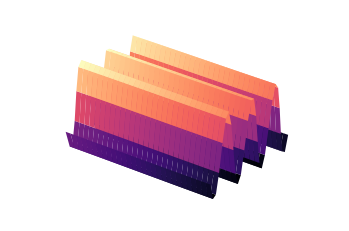

In [101]:
fps = 100

# words to duration
durations = [3 * fps, 5 * fps]
n_frames = sum(durations)
# nf_transition = lin.shape[0]

Zs = np.zeros((30, 30, sum(durations)))
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)

padding = 6

def interp(r1, r2, nfr=50):
    return np.linspace(r1, r2, nfr)
    
start = 0
end = 0
for i in range(1, len(durations)):
    src_dur = durations[i - 1]
    src = results[i - 1]
    dst = results[i]

    transition = interp(src, dst, nfr=padding)

    start = end
    end += src_dur - padding // 2
  
    print(start, end)
    # word
    for k in range(start, end):
        eq = f(src[0] + z2[k][0], src[1] + z2[k][1])
        Zs[:, :, k] = eq(X, Y)

    # transition
    for j, fr in enumerate(transition):
        x = fr[0] + z2[end + j][0]
        y = fr[1] + z2[end + j][1]
        eq = f(x, y)
        Zs[:, :, end + j] = eq(X, Y)

    end += len(transition)
    print(end)


for i in range(end, end + 500 - padding // 2):
    eq = f(dst[0] + z2[i][0], dst[1] + z2[i][1])
    Zs[:, :, i] = eq(X, Y)

def update_plot(i, Z, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, Zs[:,:,i], cmap="magma")
    ax.axis('off')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(Zs.shape)
plot = [ax.plot_surface(X, Y, Zs[:,:,0], color='0.75', rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, n_frames, fargs=(Zs, plot), interval=1000 / fps)


In [47]:
# import imagemagick
# ani.save('we-dont-250.gif',writer='imagemagick',fps=fps)
ani.save('we-dont.mp4',writer='ffmpeg',fps=fps)


In [102]:
plt.rcParams['animation.html'] = 'html5'
ani